In [1]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from sklearn.preprocessing import QuantileTransformer
import tensorflow as tf

In [2]:
mt5.initialize()

True

In [3]:
mt5.terminal_info()

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=4173, maxbars=100000000, codepage=1251, ping_last=30060, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Russian', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Program Files\\MetaTrader 5', commondata_path='C:\\Users\\HAWK\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')

In [154]:
end_date = datetime.now()
end_date = end_date - timedelta(days=365)
start_date = end_date - timedelta(days=365*5)
print(start_date, end_date)

2018-02-15 00:03:17.278629 2023-02-14 00:03:17.278629


In [155]:
gbp_usd = mt5.copy_rates_range("GBPUSD", mt5.TIMEFRAME_M15, start_date, end_date)

In [156]:
data = pd.DataFrame(gbp_usd)

In [157]:
data.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
124196,1676318400,1.21352,1.21361,1.21244,1.21267,935,4,0
124197,1676319300,1.21267,1.21358,1.21263,1.21357,1289,4,0
124198,1676320200,1.21357,1.21411,1.21357,1.21396,1177,5,0
124199,1676321100,1.21396,1.21520,1.21395,1.21469,1161,3,0
124200,1676322000,1.21468,1.21473,1.21392,1.21393,1072,5,0


In [158]:
data.shape

(124201, 8)

In [159]:
data.time = data.time.astype(np.int64)

In [160]:
data.time = pd.to_datetime(data['time'], unit='s')

In [161]:
data.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
124196,2023-02-13 20:00:00,1.21352,1.21361,1.21244,1.21267,935,4,0
124197,2023-02-13 20:15:00,1.21267,1.21358,1.21263,1.21357,1289,4,0
124198,2023-02-13 20:30:00,1.21357,1.21411,1.21357,1.21396,1177,5,0
124199,2023-02-13 20:45:00,1.21396,1.21520,1.21395,1.21469,1161,3,0
124200,2023-02-13 21:00:00,1.21468,1.21473,1.21392,1.21393,1072,5,0


<Axes: >

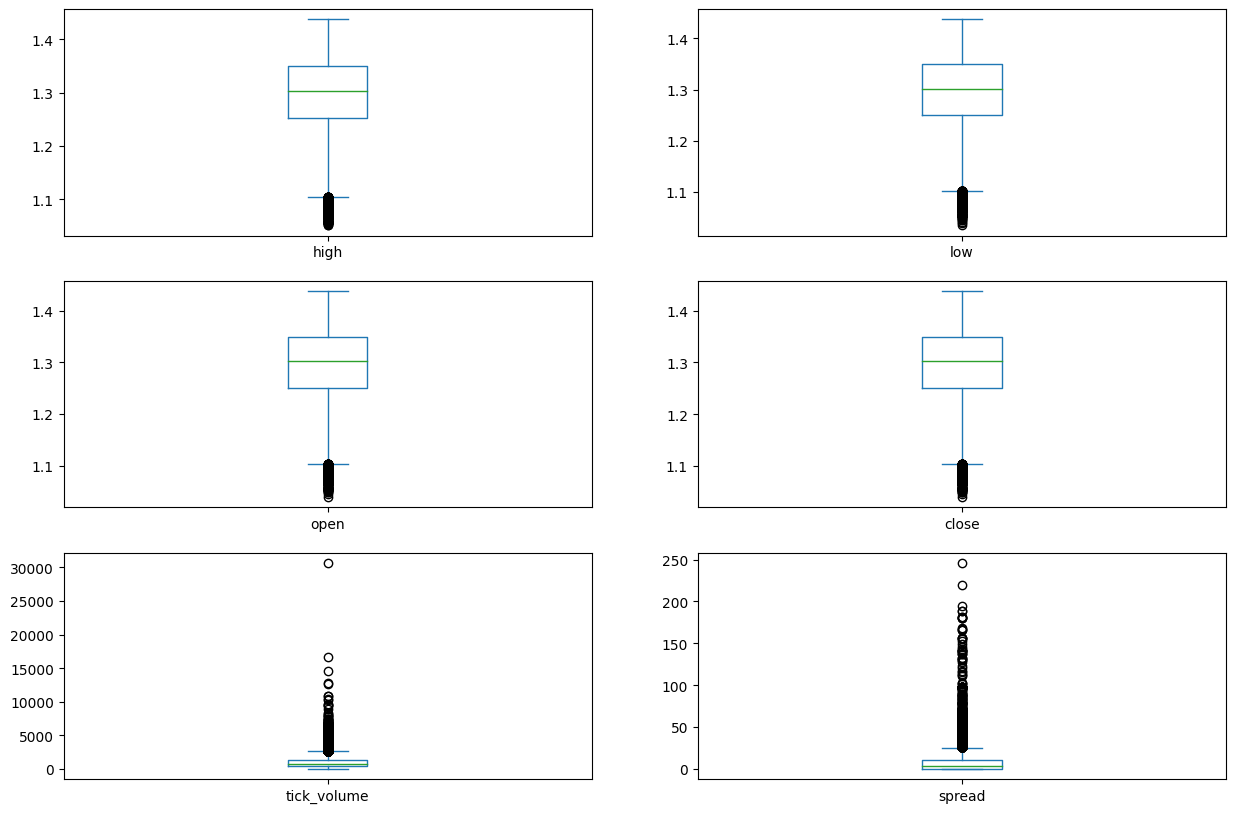

In [162]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

data['high'].plot(kind='box', ax=axis[0][0])
data['low'].plot(kind='box', ax=axis[0][1])
data['open'].plot(kind='box', ax=axis[1][0])
data['close'].plot(kind='box', ax=axis[1][1])
data['tick_volume'].plot(kind='box', ax=axis[2][0])
data['spread'].plot(kind='box', ax=axis[2][1])

In [163]:
data['hour'] = data.time.dt.hour

In [164]:
data['hour'] += data.time.dt.minute / 60

In [165]:
data.drop('time', axis=1, inplace=True)

In [166]:
data.drop('real_volume', axis=1, inplace=True)

In [167]:
data_close = data.close

In [168]:
data.shape

(124201, 7)

In [169]:
data_close.shape

(124201,)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49862 entries, 0 to 49861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         49862 non-null  float64
 1   high         49862 non-null  float64
 2   low          49862 non-null  float64
 3   close        49862 non-null  float64
 4   tick_volume  49862 non-null  uint64 
 5   spread       49862 non-null  int32  
 6   hour         49862 non-null  float64
dtypes: float64(5), int32(1), uint64(1)
memory usage: 2.5 MB


In [21]:
train_data = data[:int(data.shape[0]*0.8)]
test_data = data[int(data.shape[0]*0.8):]

In [176]:
data_close.shape

(124201,)

In [279]:
train_data = data_close[:int(data_close.shape[0]*0.65)]
val_data = data_close[int(data_close.shape[0]*0.65):int(data_close.shape[0]*0.8)]
test_data = data_close[int(data_close.shape[0]*0.8):]

In [280]:
print(train_data.unique().shape)
print(val_data.unique().shape)
print(test_data.unique().shape)

(20560,)
(7448,)
(13432,)


In [237]:
scaler_close = QuantileTransformer()
train_data = scaler_close.fit_transform(train_data.to_numpy().reshape(-1,1))
val_data = scaler_close.transform(val_data.to_numpy().reshape(-1,1))
test_data = scaler_close.transform(test_data.to_numpy().reshape(-1,1))

In [277]:
print(np.unique(train_data).shape)
print(np.unique(val_data).shape)
print(np.unique(test_data).shape)

(20555,)
(7448,)
(11230,)


In [22]:
scaler_close = QuantileTransformer()
scaler_open = QuantileTransformer()
scaler_high = QuantileTransformer()
scaler_low = QuantileTransformer()
scaler_tick_volume = QuantileTransformer()
scaler_spread = QuantileTransformer()

train_data['close'] = scaler_close.fit_transform(train_data['close'].to_numpy().reshape(-1,1))
test_data['close'] = scaler_close.transform(test_data['close'].to_numpy().reshape(-1,1))

train_data['open'] = scaler_open.fit_transform(train_data['open'].to_numpy().reshape(-1,1))
test_data['open'] = scaler_open.transform(test_data['open'].to_numpy().reshape(-1,1))

train_data['high'] = scaler_high.fit_transform(train_data['high'].to_numpy().reshape(-1,1))
test_data['high'] = scaler_high.transform(test_data['high'].to_numpy().reshape(-1,1))

train_data['low'] = scaler_low.fit_transform(train_data['low'].to_numpy().reshape(-1,1))
test_data['low'] = scaler_low.transform(test_data['low'].to_numpy().reshape(-1,1))

train_data['tick_volume'] = scaler_tick_volume.fit_transform(train_data['tick_volume'].to_numpy().reshape(-1,1))
test_data['tick_volume'] = scaler_tick_volume.transform(test_data['tick_volume'].to_numpy().reshape(-1,1))

train_data['spread'] = scaler_spread.fit_transform(train_data['spread'].to_numpy().reshape(-1,1))
test_data['spread'] = scaler_spread.transform(test_data['spread'].to_numpy().reshape(-1,1))


C:\Users\HAWK\AppData\Local\Temp\ipykernel_14804\3644892275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['close'] = scaler_close.fit_transform(train_data['close'].to_numpy().reshape(-1,1))
C:\Users\HAWK\AppData\Local\Temp\ipykernel_14804\3644892275.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['close'] = scaler_close.transform(test_data['close'].to_numpy().reshape(-1,1))
C:\Users\HAWK\AppData\Local\Temp\ipykernel_14804\3644892275.py:11: SettingWithCopyWarning: 
A value is t

In [83]:
train_data

array([[0.73249481],
       [0.73624795],
       [0.73606215],
       ...,
       [0.03640709],
       [0.0341314 ],
       [0.03272393]])

In [34]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [186]:
def create_sequences(n_past, n_future, data):
   x = []
   y = []
   for i in range(n_past, len(data)- n_future+1):
      x.append(data[i - n_past:i])
      y.append(data[i + n_future - 1:i + n_future])
   return np.array(x), np.array(y)

In [239]:
x_train, y_train = create_sequences(12, 1, train_data)
x_val, y_val = create_sequences(12, 1, val_data)
x_test, y_test = create_sequences(12, 1, test_data)

In [240]:
x_train.shape

(80718, 12, 1)

In [241]:
x_val.shape

(18618, 12, 1)

In [242]:
x_test.shape

(24829, 12, 1)

In [39]:
np.save('x_train_overlifting', x_train[:512])
np.save('y_train_overlifting', y_train[:512])

In [191]:
np.save('x_train', x_train)
np.save('y_train', y_train)
np.save('x_val', x_val)
np.save('y_val', y_val)
np.save('x_test', x_test)
np.save('y_test', y_test)

In [100]:
y_test[:10]

array([[1.21678],
       [1.21678],
       [1.21678],
       [1.21678],
       [1.21678],
       [1.21678],
       [1.21678],
       [1.21678],
       [1.21678],
       [1.21678]])

In [255]:
model = tf.keras.models.load_model('model_15m_cp')

In [285]:
y_pred = model.predict(x_test)

776/776 [==============================] - 15s 20ms/step


In [286]:
y_test = y_test.reshape(-1,1)
print('MAE до обратного масштабирования: ', abs(y_pred-y_test).mean())
y_test_unscaled = scaler_close.inverse_transform(y_test)
y_pred_unscaled = scaler_close.inverse_transform(y_pred)
print('MAE после обратного масштабирования: ', abs(y_pred_unscaled-y_test_unscaled).mean())

MAE до обратного масштабирования:  0.0031221505949556323
MAE после обратного масштабирования:  0.005190021089870865


In [287]:
print(np.concatenate((y_pred_unscaled[:10], y_test_unscaled[:10]), axis=1))

[[1.35664034 1.35551   ]
 [1.35598636 1.35555   ]
 [1.35605955 1.35509   ]
 [1.355492   1.35511   ]
 [1.35542274 1.3555    ]
 [1.3555454  1.35553   ]
 [1.35547078 1.35526   ]
 [1.35533452 1.35508   ]
 [1.35512257 1.3552    ]
 [1.35526311 1.35458   ]]


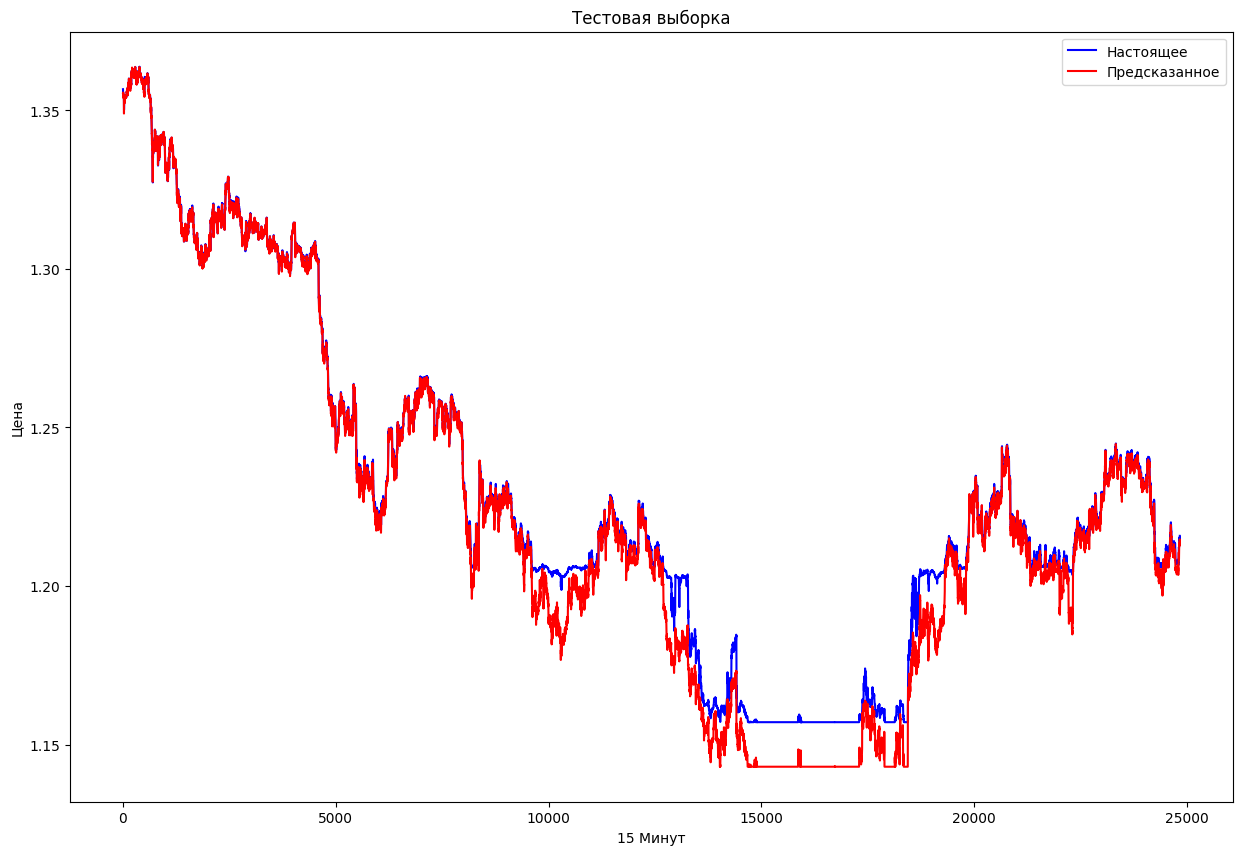

In [290]:
plt.figure(figsize=(15,10))
plt.title('Тестовая выборка')
plt.plot(y_pred_unscaled, color = 'b', label = 'Настоящее')
plt.plot(y_test_unscaled, color = 'r', label = 'Предсказанное')
plt.xlabel("15 Минут")
plt.ylabel("Цена")
plt.legend()
plt.show()

In [284]:
print(train_data.min(),test_data.min())

1.1417 1.03998


Почему на графике с предсказанием цены на тестовой выборке есть аномалия с 8000 часов до 20000? Потому что к сожалению на тренировочной выборке цена не опускалась ниже **1.1417**, а у тестовой минимальная цена - **1.03998**. Поэтому при применение обратного масштабирования возникает такая аномалия, т.к. *QuantilTransformer* обучался только на тренировочной выборке(чтобы не было data leakage). Ниже будет тест в валидационной выборкой, там все нормально.

In [291]:
y_pred = model.predict(x_val)

582/582 [==============================] - 13s 22ms/step


In [292]:
y_val = y_val.reshape(-1,1)
print('MAE до обратного масштабирования: ', abs(y_pred-y_val).mean())
y_val_unscaled = scaler_close.inverse_transform(y_val)
y_pred_unscaled = scaler_close.inverse_transform(y_pred)
print('MAE после обратного масштабирования: ', abs(y_pred_unscaled-y_val_unscaled).mean())

MAE до обратного масштабирования:  0.0012746814108592157
MAE после обратного масштабирования:  0.0004442482261338086


In [293]:
print(np.concatenate((y_pred_unscaled[:10], y_val_unscaled[:10]), axis=1))

[[1.41924798 1.41849   ]
 [1.41912711 1.41862   ]
 [1.41915095 1.41828   ]
 [1.41889608 1.41835   ]
 [1.41891658 1.4185    ]
 [1.41901076 1.41885   ]
 [1.41923177 1.41877   ]
 [1.41922152 1.41905   ]
 [1.41933334 1.41885   ]
 [1.41930103 1.41876   ]]


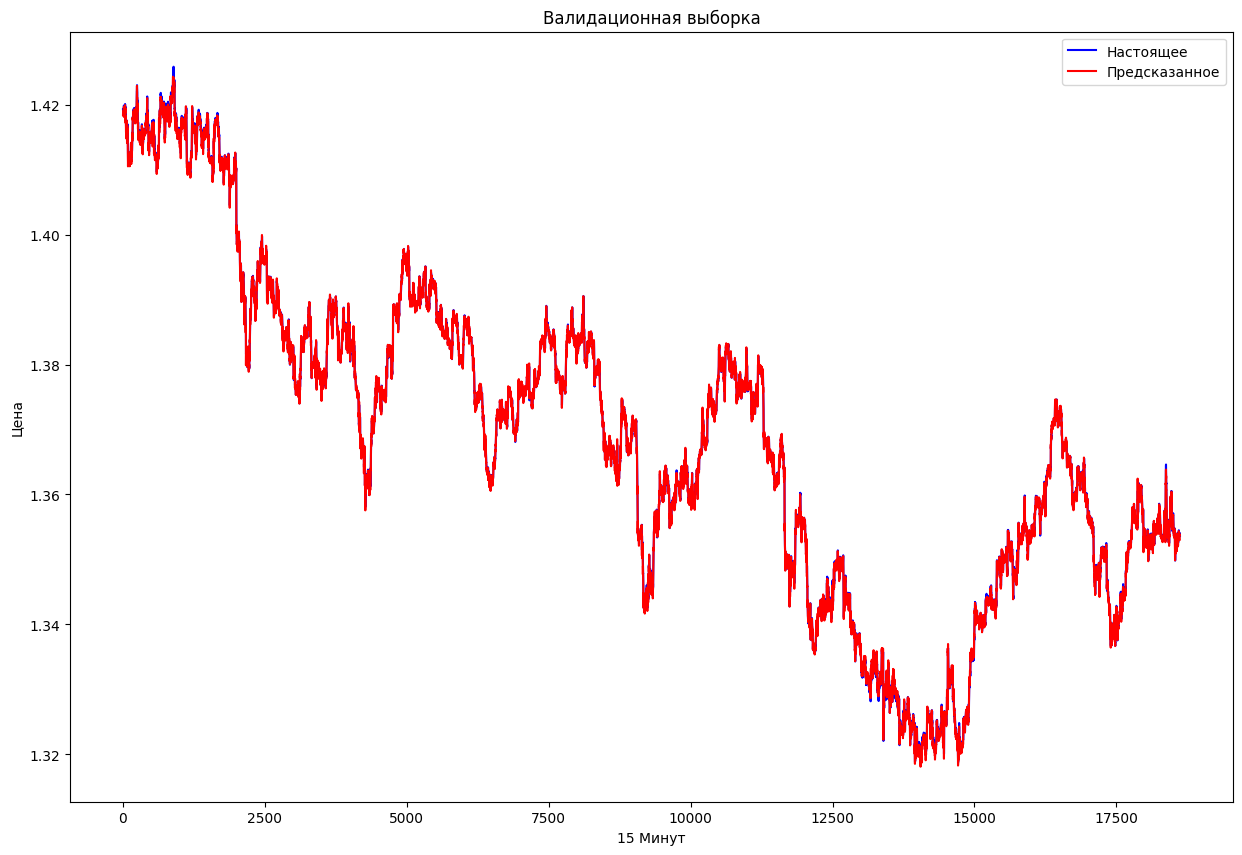

In [294]:
plt.figure(figsize=(15,10))
plt.title('Валидационная выборка')
plt.plot(y_pred_unscaled, color = 'b', label = 'Настоящее')
plt.plot(y_val_unscaled, color = 'r', label = 'Предсказанное')
plt.xlabel("15 Минут")
plt.ylabel("Цена")
plt.legend()
plt.show()

Отличным результатом считалась бы ошибка MAE = 10 пунктам, т.е. 1е-4. Но пока что это лучший результат. Надо копаться с моделькой и придумывать новую архитектуру, либо обучать больше, чем на 800 эпохах(Одна эпоха = 4 секунды, 800 эпох ~ 53 минуты. Это без учета чекпоинтов(они отжирают еще по 10-15 секунд))

In [295]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12, 1)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 12, 256)              768       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 12, 256)              1024      ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv1d_1 (Conv1D)           (None, 12, 128)              65664     ['batch_normalization[0][0